###📢 ATTENTION


This section covers the **Exploratory Data Analysis (EDA)** and **pre-processing** process.  The goal is to create a clean and ready dataset for the **modelling** stage and the implementation of **Permutation Feature Importance (PFI)** to optimize the model.

#📥 **Import modules**

In [665]:
# Data manipulation modules
import pandas as pd
import numpy as np

# Graph modules
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Data Transformation modules
from sklearn.preprocessing import OneHotEncoder

#📥 **Load graduation dataset (.csv)**

In [666]:
# Load graduation dataset from google drive directory
graduation_dataset = "/content/drive/MyDrive/Repository/Optimizing Classification Models using Permutation Feature Importance Method/Dataset/Graduation.csv"
df = pd.read_csv(graduation_dataset)
# Show dataframe of graduation dataset
df.head()

,Student ID,Gender,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status
0,mhs0001,Female,2600000,2000000.0,2.52,0.00,NaN,NaN,0,Late
1,mhs0002,Male,2600000,3000000.0,3.30,3.21,3.44,3.45,0,Late
2,mhs0003,Male,2600000,2400000.0,2.30,2.44,3.00,2.88,0,Late
3,mhs0004,Male,2600000,4000000.0,3.30,3.46,3.44,3.50,0,Late
4,mhs0005,Male,3100000,1000000.0,0.09,NaN,NaN,NaN,0,Late


# ***1. Exploratory Data Analysis (EDA)***

**EDA** is a crucial first step in analysing the data set used. Its main purpose is **to explore patterns in the data**, **including relationships between variables and the overall state of the data**. In this repository, the **EDA** process is divided into three structured parts, namely **Data Identification**, **Univariate Analysis**, **Bivariate Analysis** and **Multivariate Analysis**. Each of these sections helps to gain an in-depth understanding of the data characteristics that form an important basis for the subsequent analysis steps.

## 1.1 Data indentification

Data identification objectives:

1.   Understanding the data features being utilized
2.   Determining the data type for each feature
3.   Observing the number of missing values for each feature
4.   Detecting the presence of duplicate data rows

In [667]:
# Check the shape of the DataFrame
# This returns the number of rows and columns in the DataFrame
print("Number of rows:", f"{df.shape[0]} rows")
print("Number of columns:", f"{df.shape[1]} columns")

Number of rows: 460 rows
Number of columns: 10 columns


In [668]:
# Get the list of features and their corresponding data types in the graduation dataset
features = df.keys()
features = pd.DataFrame({'Data types': df.dtypes})
# Display the features and their data types
features

,Data types
Student ID,object
Gender,object
UKT,int64
Parents' income,float64
IPS 1,float64
IPS 2,float64
IPS 3,float64
IPS 4,float64
Retake total,int64
Graduation status,object


In [669]:
# Get the list of features that have categorical data type in the graduation dataset
categorical = list(df.select_dtypes(['object']).columns)
categorical = pd.DataFrame({'Catgorical data': categorical})
# Display the features with categorical data type
categorical

,Catgorical data
0,Student ID
1,Gender
2,Graduation status


In [670]:
# Get the list of features that have numerical data type in the graduation dataset
numerical = list(df.select_dtypes(['float64','int64']).columns)
numerical = pd.DataFrame({'Numerical data': numerical})
# Display the features with numerical data type
numerical

,Numerical data
0,UKT
1,Parents' income
2,IPS 1
3,IPS 2
4,IPS 3
5,IPS 4
6,Retake total


In [671]:
# Define a function to display features with the sum and percentage of missing values
def missing_values():
  # Calculate the total count of missing values for each feature
  missing_total = df.isnull().sum()
  # Calculate the percentage of missing values for each feature
  percentage_of_missing = ((missing_total * 100 / len(df)).round(2)).astype(str) + '%'
  # Create a DataFrame to display the total count and percentage of missing values for each feature
  missing_values = pd.DataFrame({'Total of missing': missing_total,
                                'Percentage of missing': percentage_of_missing
                                })
  return missing_values
# Call the function to display the features with their corresponding total count and percentage of missing values
missing_values()

,Total of missing,Percentage of missing
Student ID,0,0.0%
Gender,0,0.0%
UKT,0,0.0%
Parents' income,4,0.87%
IPS 1,17,3.7%
IPS 2,36,7.83%
IPS 3,55,11.96%
IPS 4,64,13.91%
Retake total,0,0.0%
Graduation status,0,0.0%


In [672]:
# Check for duplicate rows in the dataset
duplicate = df.duplicated()

# Filter out and display the duplicate rows
duplicate_row = df[duplicate]
print("Duplicate rows:")
duplicate_row = pd.DataFrame(duplicate_row)
duplicate_row

Duplicate rows:


,Student ID,Gender,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status


## 1.2 Univariate analysis

This stage aims to analyze the distribution of data from each feature utilized.

### ⚙ Pie chart function

In [673]:
def plot_pie_chart(column, title):
    count = df[column].value_counts()
    # Define custom colors for the pie chart
    custom_colors = ["coral","lightseagreen","seagreen"]
    # Calculate the percentages
    percentages = count / count.sum() * 100

    # Plotting the pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(title, pad=30)
    plt.show()

### 📊 Distribution of Graduation status

The following pie chart illustrates the **distribution of data for the Graduation Status feature as a dependent attribute or data class**. It is evident from the diagram that the data distribution is **highly unbalanced** between the **On-Time** and **Late** classes. This suggests that the number of students who are unable to complete their studies on time is significantly higher than those who successfully complete their education on schedule. This provides a clear illustration of the challenges of dealing with this imbalance in data analysis and modeling.

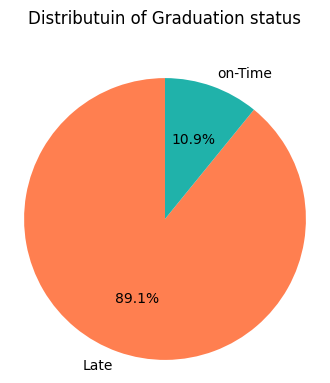

In [674]:
column_distribution = "Graduation status"
# Create a title for the pie chart based on the specified column
title = f'Distributuin of {column_distribution}'
# Call the plot_pie_chart function to create the chart
plot_pie_chart(column_distribution, title)

### 📊 Distribution of Retake total

In the **first four semesters**, the number of students who did not repeat the course was **higher than** the number who did.

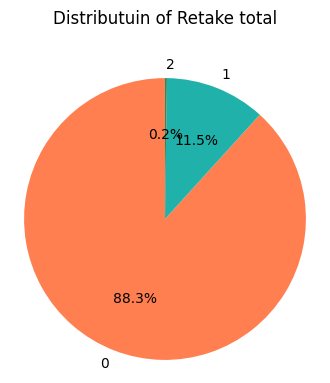

In [675]:
column_distribution = "Retake total"
# Create a title for the pie chart based on the specified column
title = f'Distributuin of {column_distribution}'
# Call the plot_pie_chart function to create the chart
plot_pie_chart(column_distribution, title)

### 📊 Descriptive statistics of Numerical data types

In [676]:
# Run descriptive statistics of numerical data types.
df.describe(include = ['float64','int64'])

,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total
count,4.600000e+02,4.560000e+02,443.000000,424.00000,405.000000,396.000000,460.000000
mean,2.558261e+06,1.827185e+08,2.993747,3.12809,3.074049,3.049116,0.119565
std,6.001064e+05,3.836929e+09,0.658665,0.74772,0.663720,0.706050,0.331445
min,5.000000e+05,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.400000e+06,1.100000e+06,2.780000,2.78000,2.860000,2.840000,0.000000
50%,2.600000e+06,2.000000e+06,3.070000,3.29000,3.190000,3.200000,0.000000
75%,3.100000e+06,3.600000e+06,3.390000,3.67000,3.470000,3.470000,0.000000
max,3.600000e+06,8.193730e+10,4.000000,4.00000,4.000000,4.000000,2.000000


## 1.3 Bivariate & Multivariate analysis

### ⚙ Function for **pie chart with condition** & **grouped bar chart**

In [677]:
def plot_pie_chart_with_condition(data, condition_column, percentage_column, title, axs):
    """
    Plot pie charts for each unique value in a condition column, showing the distribution of a percentage column.

    Parameters:
        - data: DataFrame containing the data to plot
        - condition_column: Name of the column containing conditions/categories
        - percentage_column: Name of the column containing percentages to visualize
        - title: Title of the overall plot
        - axs: List of axes objects to plot each pie chart

    Returns:
        None (plots the pie charts directly on the provided axes)
    """

    # Get unique values in the condition column
    unique_conditions = data[condition_column].unique()
    # Iterate through each unique condition
    for i, condition_value in enumerate(unique_conditions):
        # Filter data for the current condition value
        filtered_data = data[data[condition_column] == condition_value]
        # Count occurrences of each value in the percentage column
        value_counts = filtered_data[percentage_column].value_counts()
        # Calculate percentages
        percentages = (value_counts / value_counts.sum()) * 100
        # Define custom colors for the pie chart
        custom_colors = ["coral","lightseagreen","seagreen"]
        # Plot the pie chart on the specified axis
        axs[i].pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
        # Set title for the pie chart
        axs[i].set_title(f'{percentage_column} by {condition_column} is {condition_value}', fontsize=10, pad=20)

In [678]:
def plot_grouped_bar_chart(data, x_label, y_label, title):
    # Get the number of categories and groups
    num_categories = len(data)
    num_groups = len(data.columns[1:])
    # Define the custom colors for the grouped bars
    custom_colors = ["coral","lightseagreen","seagreen"]
    # Set the width of each bar and the interval between groups
    bar_width = 0.8 / num_groups
    bar_interval = bar_width / num_categories
    # Create the bar positions
    bar_positions = np.arange(num_categories)
    # Plot the grouped bar chart
    plt.figure(figsize=(8, 4))
    for i, category in enumerate(data.columns[1:]):
        plt.bar(bar_positions + (i * bar_width) - ((num_groups - 1) * bar_interval) / 2, data[category], bar_width,
                label=category, color=custom_colors[i])
        # Add data labels to each bar
        for x, y in zip(bar_positions, data[category]):
            plt.text(x + (i * bar_width) - ((num_groups - 1) * bar_interval) / 2, y + 1, str(y), ha='center')
    # Add labels, title, and legend
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(bar_positions, data[data.columns[0]])
    plt.legend()
    plt.show()

### 📊 Graduation status by **student gender**

The pie chart below shows that female students are more likely to complete their education on time. However, the number of female and male students who do not complete their education on time is equally significant.

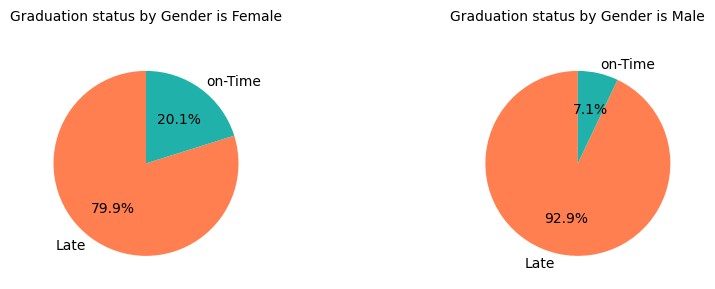

In [679]:
# Create a figure and axis for the subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
# Plot pie chart for each gender
plot_pie_chart_with_condition(df, 'Gender', 'Graduation status', 'Graduation status by Gender', axs)
plt.tight_layout()
plt.show()

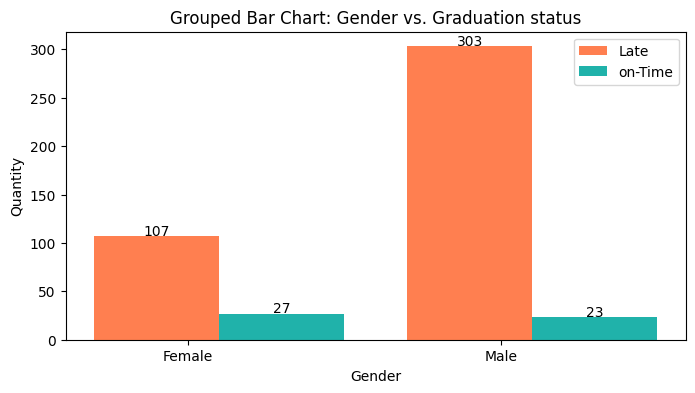

In [680]:
# Extract the required data for visualization
data = df[['Gender', 'Graduation status']]
# Group the data by Gender and Graduation status, and count the number of occurrences
data_grouped = data.groupby(['Gender', 'Graduation status']).size().unstack()
# Reset the index to make the Gender column a regular column
data_grouped = data_grouped.reset_index()
# Define the labels for x-axis, y-axis, and title
x_label = 'Gender'
y_label = 'Quantity'
title = 'Grouped Bar Chart: Gender vs. Graduation status'
# Plot the grouped bar chart using the function with custom colors
plot_grouped_bar_chart(data_grouped, x_label, y_label, title)

### 📊 **IPS average** by student graduation status type

In the analysis of average IPS data across the initial four semesters, a clear trend emerges: students who achieve timely graduation display an average IPS exceeding 3.30. Conversely, those unable to graduate on schedule are characterized by an average IPS below 3.00, showcasing a gradual decline in their IPS over time.

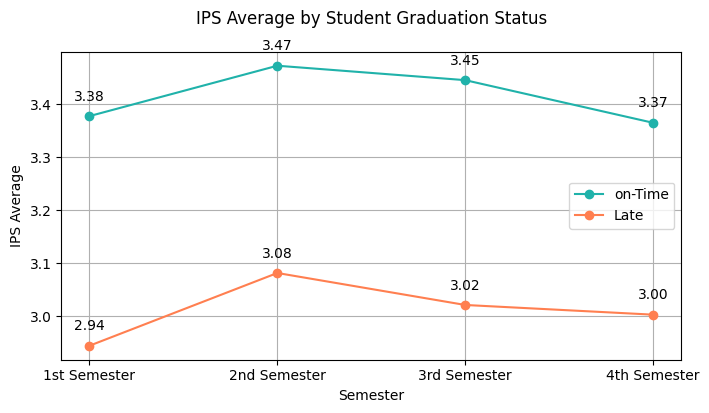

In [681]:
# Calculate the average IPS for on-Time and Late students for each semester
ips_mean_on_time = []
ips_mean_late = []

for i in range(1, 5):
    ips_mean_on_time.append(df[df['Graduation status'] == 'on-Time'][f'IPS {i}'].mean())
    ips_mean_late.append(df[df['Graduation status'] == 'Late'][f'IPS {i}'].mean())

# Semester labels for the plot
semester_labels = ['1st Semester', '2nd Semester', '3rd Semester', '4th Semester']

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(semester_labels, ips_mean_on_time, marker='o', label='on-Time', color='lightseagreen')
plt.plot(semester_labels, ips_mean_late, marker='o', label='Late', color='coral')

# Labeling and title
plt.xlabel('Semester')
plt.ylabel('IPS Average')
plt.title('IPS Average by Student Graduation Status', pad=20)
plt.legend()
plt.grid(True)

# Display average values for each semester on the plot
for i, semester in enumerate(semester_labels):
    for j, graduate in enumerate(['on-Time', 'Late']):
        plt.text(semester_labels[i], (ips_mean_on_time[i] if graduate == 'on-Time' else ips_mean_late[i]) + 0.05,
                 f'{ips_mean_on_time[i] if graduate == "on-Time" else ips_mean_late[i]:.2f}',
                 ha='center', va='top')

# Show the plot
plt.show()

### 📊 Graduation status by student **repeat course** total

The graph below reveals a striking trend: as students repeat a class more frequently within the first four semesters, their likelihood of graduating on time diminishes. On the contrary, abstaining from class repetitions during this period does not assure timely graduation. This underscores the importance of evaluating and considering additional factors crucial to supporting students' academic success.

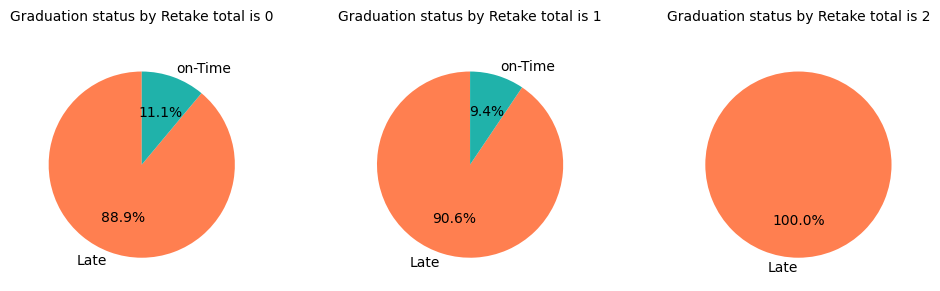

In [682]:
# Create a figure and axis for the subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
# Plot pie chart for each Retake total
plot_pie_chart_with_condition(df, 'Retake total', 'Graduation status', 'Graduation status by Retake total', axs)
plt.tight_layout()
plt.show()

### 📊 Graduation status by **IP range** for each semester

⚠ **The IPS range is determined based on the number of credits students can take in the next semester.**

The data observed indicate that numerous students who uphold an average IPS surpassing 3.00 for four consecutive semesters manage to graduate on time. Nonetheless, it is crucial to note that sustaining an average IPS above 3.00 does not automatically ensure timely graduation. This phenomenon is influenced by numerous factors, emphasizing the necessity for a comprehensive assessment of the multifaceted aspects that impact students' academic success.

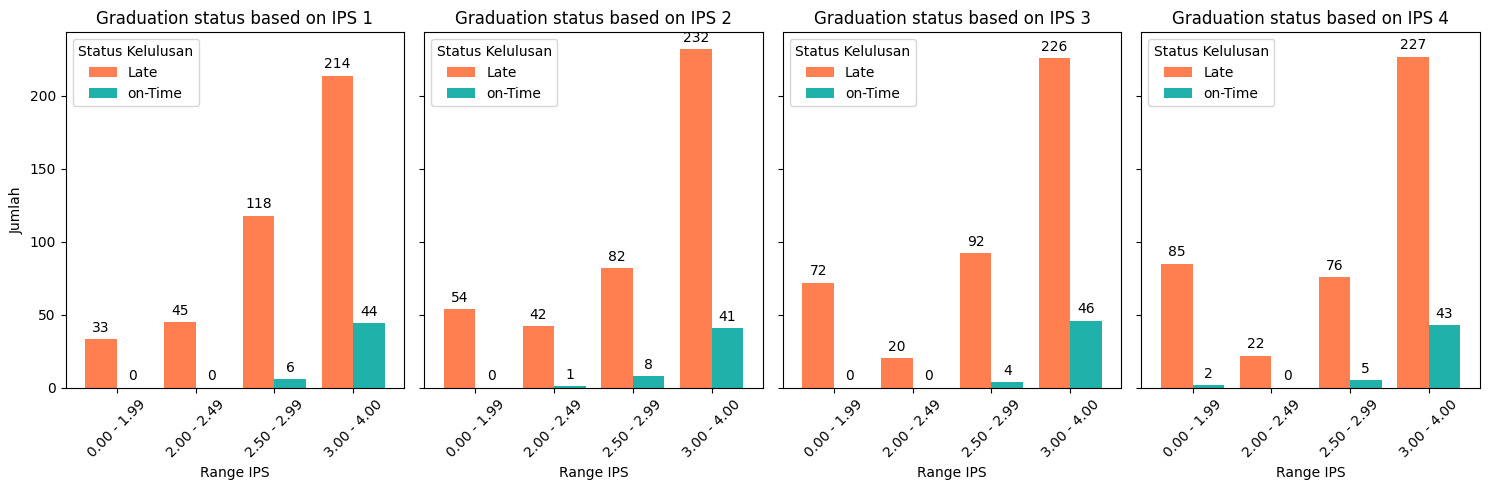

In [683]:
# Function to add labels on top of bars
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Function to get the IPS range
def get_ip_range(ip):
    try:
        ip = float(ip)  # Ensure ip can be converted to float
    except ValueError:
        return 'Unknown'  # Return default value if conversion fails
    # Return IPS range based on the value
    if ip >= 3.00:
        return '3.00 - 4.00'
    elif ip >= 2.50:
        return '2.50 - 2.99'
    elif ip >= 2.00:
        return '2.00 - 2.49'
    else:
        return '0.00 - 1.99'

# Function to create a grouped bar chart for each semester
def plot_grouped_bar_chart(df):
    # Melt DataFrame for IPS and Graduation status
    df_melted = df.melt(id_vars=['Graduation status'], value_vars=['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4'],
                        var_name='Semester', value_name='IPS')

    # Apply the get_ip_range function to create the IP_Range column
    df_melted['IP_Range'] = df_melted['IPS'].apply(get_ip_range)

    # Aggregate data for each semester
    summary_by_semester = df_melted.groupby(['Semester', 'IP_Range', 'Graduation status']).size().unstack(fill_value=0)

    # Define colors for "On-Time" and "Late" statuses
    colors = {'on-Time': 'lightseagreen', 'Late': 'coral'}

    # Get list of unique semesters
    semesters = df_melted['Semester'].unique()

    # Create subplots
    fig, axs = plt.subplots(nrows=1, ncols=len(semesters), figsize=(15, 5), sharey=True)

    # Loop through each semester to create a bar chart
    for i, semester in enumerate(semesters):
        data = summary_by_semester.loc[semester]
        ax = axs[i]
        bars = data.plot(kind='bar', ax=ax, color=colors, width=0.8)

        # Add labels for each bar
        autolabel(bars.patches, ax)

        # Set title, axis labels, and legend
        ax.set_title(f'Graduation status based on {semester}')
        ax.set_xlabel('Range IPS')
        ax.set_ylabel('Jumlah')
        ax.set_xticklabels(data.index, rotation=45)
        ax.legend(title='Status Kelulusan')

    # Adjust layout for a cleaner appearance
    plt.tight_layout()
    # Display the plot
    plt.show()

# Use the function to plot the grouped bar chart
plot_grouped_bar_chart(df)

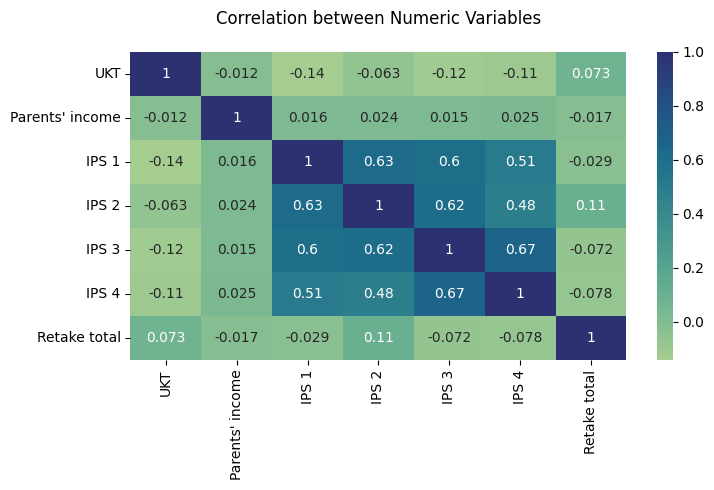

In [684]:
# List of numeric features to be used for correlation calculation
numeric_column = ["UKT","Parents' income","IPS 1","IPS 2","IPS 3", "IPS 4", "Retake total"]
# Calculate the Pearson correlation matrix
corr_pearson = df[numeric_column].corr()
# Create a figure and set its size
plt.figure(figsize=(8, 4))
# Create the heatmap using seaborn
sns.heatmap(corr_pearson, cmap="crest", annot=True)
# Add a title to the plot
plt.title('Correlation between Numeric Variables', pad=20)
# Display the plot
plt.show()

# ***2. Pre-Processing***


Preprocessing, considered a critical step in the knowledge discovery process, guarantees that decisions are grounded in high-quality data. Through this step, errors within the data are minimized, and systematic biases are addressed before analysis ensues.

## **2.1 Handle missing values**

Machine learning research often grapples with incomplete data sets due to missing values. Since most machine learning algorithms require complete data, missing values can weaken the process and degrade data quality. Addressing this issue is crucial for maintaining overall data integrity and ensuring the effectiveness of machine learning outcomes.

In [685]:
# Show features with percentage of missing values
missing_values()

,Total of missing,Percentage of missing
Student ID,0,0.0%
Gender,0,0.0%
UKT,0,0.0%
Parents' income,4,0.87%
IPS 1,17,3.7%
IPS 2,36,7.83%
IPS 3,55,11.96%
IPS 4,64,13.91%
Retake total,0,0.0%
Graduation status,0,0.0%


### 👉 Imputation for categorical data


> ⚠ **No missing values for categorical data**.


### 👉 Imputation for numerical data

In [686]:
# Imputation of missing values:
# Fill missing values in the "Parents' income" column with the median value
df["Parents' income"].fillna(df["Parents' income"].median(), inplace=True)
# Fill missing values in the "IPS 1" column with 0
df["IPS 1"].fillna(0, inplace=True)
# Fill missing values in the "IPS 2" column with 0
df["IPS 2"].fillna(0, inplace=True)
# Fill missing values in the "IPS 3" column with 0
df["IPS 3"].fillna(0, inplace=True)
# Fill missing values in the "IPS 4" column with 0
df["IPS 4"].fillna(0, inplace=True)
# Function to check for any remaining missing values after imputation
missing_values()

,Total of missing,Percentage of missing
Student ID,0,0.0%
Gender,0,0.0%
UKT,0,0.0%
Parents' income,0,0.0%
IPS 1,0,0.0%
IPS 2,0,0.0%
IPS 3,0,0.0%
IPS 4,0,0.0%
Retake total,0,0.0%
Graduation status,0,0.0%


## **2.2 Handle outlier data**

### 📊 Detect outlier data

Observations with **extreme values**, either univariate (per variable) or multivariate (involving more than one variable), are considered data outliers, also known as **anomalous data**, within a dataset. It should be noted that these observations need to be excluded from the analysis to prevent skewing the results. These **extreme values** stand out significantly from most of the other values in their group, as if they were generated by a different mechanism.

Outlier data, known as **abnormal data**, exhibits characteristics that significantly deviate from the average or general pattern of other data. Conversely, data objects that are not outliers are often referred to as normal data, as they fall within the expected or representative range of the data group as a whole.

#### ✅ Using Min-Max value detection

Outlier data detection is performed on features with numeric value types. By analyzing the minimum and maximum values of a feature, it can be determined whether the feature contains outlier values. In this case, outliers were only found in the **Parents' income** feature, where **the maximum value was identified as a random value that may have resulted from user data input errors**. Meanwhile, the values of the other features are reasonable and not anomalous.

In [687]:
# List of features to be normalized
num_column = ["UKT","Parents' income","IPS 1","IPS 2","IPS 3", "IPS 4", "Retake total"]

In [688]:
print("Minimum values:")
# Get the minimum values for each feature
dict_min = df[num_column].min().to_dict()
# Create a DataFrame to display the minimum values
dict_mins = pd.DataFrame(dict_min, index=['Minimum Value'])
dict_mins

Minimum values:


,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total
Minimum Value,500000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [689]:
print("Maximum values:")
# Get the maximum values for each feature
dict_max = df[num_column].max().to_dict()
# Create a DataFrame to display the maximum values
dict_maxs = pd.DataFrame(dict_max, index=['Maximum Value'])
dict_maxs

Maximum values:


,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total
Maximum Value,3600000.0,8.193730e+10,4.0,4.0,4.0,4.0,2.0


#### ✅ Using z-score

The **z-score analysis** also identifies the value of **'8.193730e+10'** in the **Parents' income** feature as an outlier.


Outliers, although they can sometimes represent valid and uncontaminated data, exhibit extreme values compared to most values within their group. When identified outliers are not due to contamination, two approaches can be considered for handling them.


1.   The option to eliminate the outlier data.
2.   The outliers might signal an important phenomenon, warranting retention of the data.

Paying attention to outlier data is crucial as it can introduce bias and affect research results. However, the approach to handling outliers should align with the study's objectives. ***If extreme values are necessary for evaluation, then retaining outlier data without modification may be appropriate.***

> 📌 **Z-Score Formula**

$$
Z = \frac{X - \mu}{\sigma}
$$

**Notes:**
1.   Z = Z-score
2.   X = Observed value
3.   μ = Population mean
4.   σ = Standard deviation

> ⚠ **In this case, the outlier data is removed.**




##### ⚙ Function of **z-score visualization**

In [690]:
# Function of z-score visualisation.
def zscore_visualization(df, column, zscores, outliers):
    # Plot the z-scores with detailed bell-shaped curve.
    plt.figure(figsize=(8, 4))

    # Plot the histogram of z-scores.
    plt.hist(zscores, bins=30, density=True, alpha=0.6, color='lightseagreen', label='Z-Scores')

    # Plot the bell-shaped curve.
    x = np.linspace(zscores.min(), zscores.max(), 100)
    plt.plot(x, norm.pdf(x), 'r-', label='Bell Curve')

    # Add threshold lines for outliers.
    plt.axvline(-3, color='r', linestyle='--', label='Threshold')
    plt.axvline(3, color='r', linestyle='--')

    # Highlight individual outliers.
    plt.scatter(outliers, np.zeros_like(outliers), color='red', label='Individual Outliers')

    plt.xlabel('Z-Score')
    plt.ylabel('Density')
    plt.title(f'Z-Score Distribution of {column} with Bell-Shaped Curve')

    # Display the count of outliers.
    plt.text(0.02, 0.9, f'Outliers: {len(outliers)} Data', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

    plt.legend()
    plt.grid(True)
    plt.show()

In [691]:
# Calculate the Z-score for each entry in the "Parents' income" column.
# The Z-score represents how many standard deviations an element is from the mean.
df["zscore"] = (df["Parents' income"] - df["Parents' income"].mean())/ df["Parents' income"].std()
# Display the first few rows of the dataframe to check the newly calculated Z-scores.
df.head()

,Student ID,Gender,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status,zscore
0,mhs0001,Female,2600000,2000000.0,2.52,0.00,0.00,0.00,0,Late,-0.046895
1,mhs0002,Male,2600000,3000000.0,3.30,3.21,3.44,3.45,0,Late,-0.046633
2,mhs0003,Male,2600000,2400000.0,2.30,2.44,3.00,2.88,0,Late,-0.046790
3,mhs0004,Male,2600000,4000000.0,3.30,3.46,3.44,3.50,0,Late,-0.046371
4,mhs0005,Male,3100000,1000000.0,0.09,0.00,0.00,0.00,0,Late,-0.047156


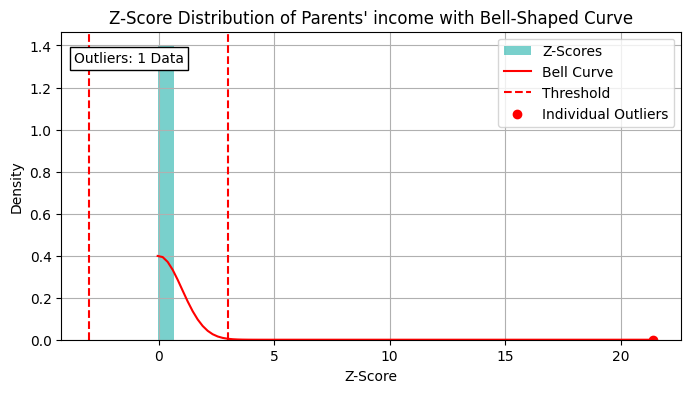

In [692]:
# Retrieve data with a z-score value that is less than -3 or greater than 3.
account_length_outliers = df[(df.zscore < -3) | (df.zscore > 3)]
# z-score distribution of Parents' income feature.
zscore_visualization(df,"Parents' income", df['zscore'], account_length_outliers['zscore'])

In [693]:
# Detail of the outlier row dataset
account_length_outliers

,Student ID,Gender,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status,zscore
129,mhs0130,Female,2400000,8.193730e+10,3.22,3.5,3.28,3.4,0,on-Time,21.400954


In [694]:
# Keeping rows that are not considered outliers (z-score between -3 and +3)
df = df[(df.zscore > -3) & (df.zscore < 3)]
# Display the dataset without the rows containing outlier data
df.head()

,Student ID,Gender,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status,zscore
0,mhs0001,Female,2600000,2000000.0,2.52,0.00,0.00,0.00,0,Late,-0.046895
1,mhs0002,Male,2600000,3000000.0,3.30,3.21,3.44,3.45,0,Late,-0.046633
2,mhs0003,Male,2600000,2400000.0,2.30,2.44,3.00,2.88,0,Late,-0.046790
3,mhs0004,Male,2600000,4000000.0,3.30,3.46,3.44,3.50,0,Late,-0.046371
4,mhs0005,Male,3100000,1000000.0,0.09,0.00,0.00,0.00,0,Late,-0.047156


In [695]:
# Reset the index of the dataset
df.reset_index(inplace = True)
# Drop the old index column
df.drop("index",inplace=True,axis=1)
# Display the dataset with the new index
df.head()

<ipython-input-695-8f5adfbb4eeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("index",inplace=True,axis=1)


,Student ID,Gender,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status,zscore
0,mhs0001,Female,2600000,2000000.0,2.52,0.00,0.00,0.00,0,Late,-0.046895
1,mhs0002,Male,2600000,3000000.0,3.30,3.21,3.44,3.45,0,Late,-0.046633
2,mhs0003,Male,2600000,2400000.0,2.30,2.44,3.00,2.88,0,Late,-0.046790
3,mhs0004,Male,2600000,4000000.0,3.30,3.46,3.44,3.50,0,Late,-0.046371
4,mhs0005,Male,3100000,1000000.0,0.09,0.00,0.00,0.00,0,Late,-0.047156


In [696]:
# Remove the "zscore" column from the dataset
df.drop("zscore",inplace=True,axis=1)
# Display the updated dataset without the "zscore" column
df.head()

<ipython-input-696-6b32a35aadfc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("zscore",inplace=True,axis=1)


,Student ID,Gender,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status
0,mhs0001,Female,2600000,2000000.0,2.52,0.00,0.00,0.00,0,Late
1,mhs0002,Male,2600000,3000000.0,3.30,3.21,3.44,3.45,0,Late
2,mhs0003,Male,2600000,2400000.0,2.30,2.44,3.00,2.88,0,Late
3,mhs0004,Male,2600000,4000000.0,3.30,3.46,3.44,3.50,0,Late
4,mhs0005,Male,3100000,1000000.0,0.09,0.00,0.00,0.00,0,Late


## **2.3 Feature encoding**

Feature encoding is the process of converting categorical data types into numerical data types so that they can be processed by machine learning methods.

In this case, the feature encoding method used is

1.   **Gender**: One-Hot Encoding
2.   **Graduation status**: Lable Encoding


### 👉 One-hot encoding

In [697]:
# Create an instance of OneHotEncoder
one_enc = OneHotEncoder()

In [698]:
# Reshape the "Gender" column
x = df["Gender"].values.reshape(-1,1)
# Fit and transform the "Gender" column
fit_gender = one_enc.fit_transform(x).toarray()

In [699]:
# Create a DataFrame for the one-hot encoded "gender" column with appropriate column names
df_gender = pd.DataFrame(fit_gender,columns=['is_'+str(one_enc.categories_[0][i]) for i in range(len(one_enc.categories_[0]))])
# Display the DataFrame with the assigned column names for each one-hot vector
df_gender.head()

,is_Female,is_Male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [700]:
# Concatenate the original df with the df_gender DataFrame along axis=1
df = pd.concat([df_gender, df],axis=1)
# Display the first few rows of the new concatenated DataFrame
df.head()

,is_Female,is_Male,Student ID,Gender,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status
0,1.0,0.0,mhs0001,Female,2600000,2000000.0,2.52,0.00,0.00,0.00,0,Late
1,0.0,1.0,mhs0002,Male,2600000,3000000.0,3.30,3.21,3.44,3.45,0,Late
2,0.0,1.0,mhs0003,Male,2600000,2400000.0,2.30,2.44,3.00,2.88,0,Late
3,0.0,1.0,mhs0004,Male,2600000,4000000.0,3.30,3.46,3.44,3.50,0,Late
4,0.0,1.0,mhs0005,Male,3100000,1000000.0,0.09,0.00,0.00,0.00,0,Late


In [701]:
# Droping the "Gender" column
df.drop("Gender",inplace=True,axis=1)
df.head()

,is_Female,is_Male,Student ID,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status
0,1.0,0.0,mhs0001,2600000,2000000.0,2.52,0.00,0.00,0.00,0,Late
1,0.0,1.0,mhs0002,2600000,3000000.0,3.30,3.21,3.44,3.45,0,Late
2,0.0,1.0,mhs0003,2600000,2400000.0,2.30,2.44,3.00,2.88,0,Late
3,0.0,1.0,mhs0004,2600000,4000000.0,3.30,3.46,3.44,3.50,0,Late
4,0.0,1.0,mhs0005,3100000,1000000.0,0.09,0.00,0.00,0.00,0,Late


### 👉 lable encoding

In [702]:
# Create a mapping dictionary
mapping = {"on-Time" : 1, "Late" : 0}
# Map the values of "Graduation status" column using the mapping dictionary
df["Graduation status"] = df["Graduation status"].map(mapping)
# Display the first 10 rows of the DataFrame
df.head(10)

,is_Female,is_Male,Student ID,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status
0,1.0,0.0,mhs0001,2600000,2000000.0,2.52,0.00,0.00,0.00,0,0
1,0.0,1.0,mhs0002,2600000,3000000.0,3.30,3.21,3.44,3.45,0,0
2,0.0,1.0,mhs0003,2600000,2400000.0,2.30,2.44,3.00,2.88,0,0
3,0.0,1.0,mhs0004,2600000,4000000.0,3.30,3.46,3.44,3.50,0,0
4,0.0,1.0,mhs0005,3100000,1000000.0,0.09,0.00,0.00,0.00,0,0
5,0.0,1.0,mhs0006,3100000,3800000.0,3.22,3.25,3.56,3.64,0,0
6,0.0,1.0,mhs0007,3100000,4500000.0,2.78,2.57,3.00,3.24,0,0
7,0.0,1.0,mhs0008,2600000,2348375.0,0.00,0.00,0.00,0.00,0,0
8,1.0,0.0,mhs0009,2400000,1500000.0,3.87,4.00,3.88,3.86,0,0
9,1.0,0.0,mhs0010,2400000,1000000.0,3.70,3.88,3.88,3.73,0,0


## **2.4 Data normalization using min-max normalization**

Data normalization is the process of transforming data into a specific range, such as between 0 and 1, or -1 and 1. It is necessary when there is a significant difference in the range of values between different features.  Normalization has the benefit of making data more comparable without causing excessive memory or power consumption.

> 📌 **MinMax Normalization Formula**

$$
x′ = \frac{𝑥𝑖 - 𝑚𝑖𝑛(𝑥)}{𝑚𝑎𝑥(𝑥) − 𝑚𝑖𝑛(𝑥)}
$$

**Notes:**
1.   x′ = Result of normalization
2.   𝑥𝑖 = Specific value
3.   𝑚𝑖𝑛(𝑥) = Minimum value of the attribute
4.   𝑚𝑎𝑥(𝑥) = Maximum value of the attribute

In [703]:
def normalize(df, dict_min, dict_max, decimal_places=2):
    """
    Normalize the specified columns in the DataFrame using the provided minimum and maximum values.

    Parameters:
        - df: DataFrame to normalize
        - dict_min: Dictionary containing the minimum values for each column to normalize
        - dict_max: Dictionary containing the maximum values for each column to normalize
        - decimal_places: Number of decimal places to round the normalized values (default is 2)

    Returns:
        - Normalized DataFrame
    """
    for key in dict_min.keys():
        df[key] = round((df[key] - dict_min[key]) / (dict_max[key] - dict_min[key]), decimal_places)
    return df

In [704]:
# Call the 'normalize' function on the 'df' DataFrame
df_final = normalize(df, dict_min, dict_max, decimal_places=3)
df_final.head()

,is_Female,is_Male,Student ID,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status
0,1.0,0.0,mhs0001,0.677,0.0,0.630,0.000,0.00,0.000,0.0,0
1,0.0,1.0,mhs0002,0.677,0.0,0.825,0.802,0.86,0.862,0.0,0
2,0.0,1.0,mhs0003,0.677,0.0,0.575,0.610,0.75,0.720,0.0,0
3,0.0,1.0,mhs0004,0.677,0.0,0.825,0.865,0.86,0.875,0.0,0
4,0.0,1.0,mhs0005,0.839,0.0,0.022,0.000,0.00,0.000,0.0,0


## 📧 Save normalized graduation dataset

In [705]:
# Specify the path where you want to save the CSV file
csv_file_path = '/content/drive/MyDrive/Repository/Optimizing Classification Models using Permutation Feature Importance Method/Dataset/Graduation_final.csv'
# Save the DataFrame to a CSV file
df_final.to_csv(csv_file_path, index=False)
# Print the path where the CSV file is saved
print("Number of rows:", f"{df_final.shape[0]} rows")
print("Number of columns:", f"{df_final.shape[1]} columns")
print(f"DataFrame saved to: {csv_file_path}")

Number of rows: 459 rows
Number of columns: 11 columns
DataFrame saved to: /content/drive/MyDrive/Repository/Optimizing Classification Models using Permutation Feature Importance Method/Dataset/Graduation_final.csv
